# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston. 

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/machine_learning/housing.csv',
                    sep=',', encoding='iso-8859-1')

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [5]:
df.shape

(489, 4)

## **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN)

In [6]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [7]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [8]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [9]:
import plotly.express as px

In [10]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [11]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [12]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [13]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

## **CORRELAÇÃO LINEAR**

In [14]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [15]:
import matplotlib.pyplot as plt

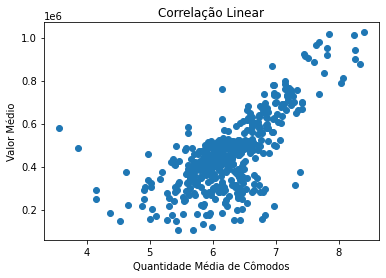

In [16]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

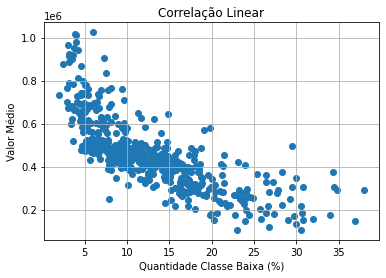

In [17]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(True)


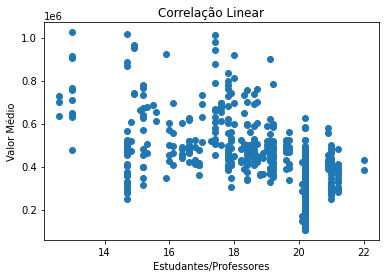

In [18]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

In [19]:
import seaborn as sns

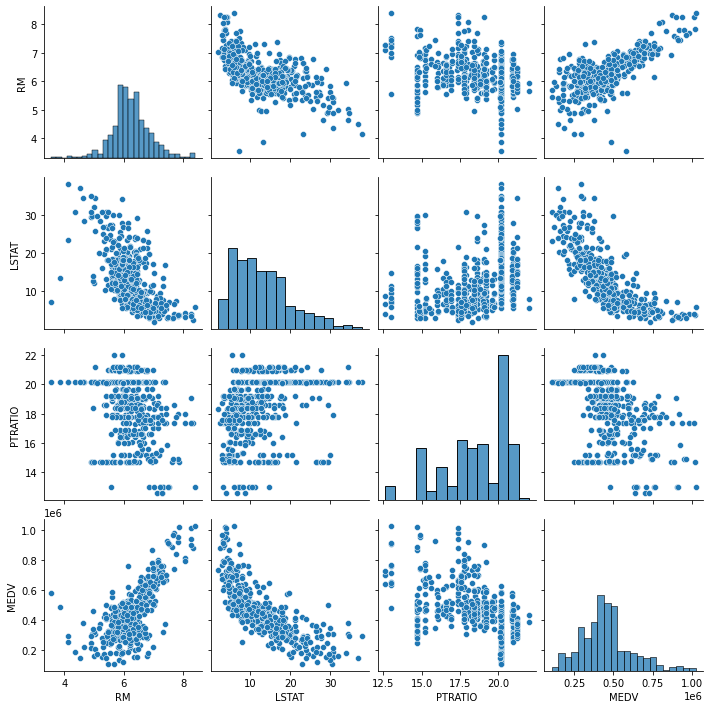

In [20]:
sns.pairplot(df);

### Análise da Normalidade

Gráfico QQ-Plot

In [21]:
import scipy.stats as stats

In [ ]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

In [ ]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

In [ ]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

In [ ]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

Teste Shapiro-Wilk

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
stats.shapiro(df.MEDV)

In [ ]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Teste Lilliefors (Kolmogorov_Sminorv)

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

In [ ]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

### Correlação Linear

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [ ]:
# Pearson
#coef,p = stats.pearsonr(df.MEDV, df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

In [ ]:
# Kendall
#coef,p = stats.kendalltau(df.MEDV,df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

In [ ]:
correlacoes = df.corr(method='spearman')
correlacoes

In [ ]:
plt.figure()
sns.heatmap(correlacoes, annot=True);

## **REGRESSÃO LINEAR SIMPLES**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

### Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino, y_treino)

In [ ]:
# Intercepto (coeficiente linear)
reg_linear1.intercept_

In [ ]:
# Coeficiente Angular
reg_linear1.coef_

**Equação: Valor = -626510,27 + 173771,45.número_cômodos**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear1.score(x_treino, y_treino)

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear1.score(x_teste, y_teste)

In [ ]:
previsoes_treino = reg_linear1.predict(x_treino)
previsoes_treino

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(3, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade Média de Cômodos')
plt.show()

In [ ]:
previsoes_teste = reg_linear1.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(4, 9)
plt.plot(X_plot, X_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Cômodos')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear1.predict([[4]])
valor_casa

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### Valor médio (MEDV) em função da classe social (LSTAT)

In [ ]:
df.head(2)

In [ ]:
x2 = df.iloc[:,1:2].values
x2

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state = 10)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino, y_treino)

In [ ]:
# Intercepto (coeficiente linear)
reg_linear2.intercept_

In [ ]:
# Coeficiente Angular
reg_linear2.coef_

**Equação: Valor = 681977,75 - 17263,75.LSTAT**

In [ ]:
# Coeficiente de Determinação dados de treino
reg_linear2.score(x_treino, y_treino)

In [ ]:
previsoes_treino = reg_linear2.predict(x_treino)
previsoes_treino

In [ ]:
plt.scatter(y=y_treino, x=x_treino, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(0, 40)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
previsoes_teste = reg_linear2.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação dados de teste
reg_linear2.score(x_teste, y_teste)

In [ ]:
plt.scatter(y=y_teste, x=x_teste, color='blue', s=10, alpha=0.9)
X_plot = np.linspace(2, 35)
plt.plot(X_plot, X_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='r')
plt.title('Reta de regressão')
plt.ylabel('Valor Médio')
plt.xlabel('Quantidade de Proprietários de Classe Média Baixa (%)')
plt.show()

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = reg_linear2.predict([[25]])
valor_casa

**Métricas de Desempenho**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes_teste).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coef. determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

## **REGRESSÃO LINEAR MÚLTIPLA**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

In [ ]:
multipla.intercept_

In [ ]:
multipla.coef_

In [ ]:
print("Equação: Valor = {:.2f} + ({:.2f})*RM + ({:.2f})*LSTAT + ({:.2f})*PTRATIO".format(multipla.intercept_, multipla.coef_[0], multipla.coef_[1], multipla.coef_[2]))

In [ ]:
# Coeficiente de Determinação
multipla.score(x_treino, y_treino)

**TESTE**

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

In [ ]:
y_teste

In [ ]:
# Coeficiente de Determinação
multipla.score(x_teste, y_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = multipla.predict([[6,20,12]])
valor_casa

**MÉTRICAS**

In [ ]:
# Erro absoluto
abs(y_teste - previsoes).mean()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes)

In [ ]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

## **REGRESSÃO POLINOMIAL**

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html 

Valor médio (MEDV) em função do número de cômodos (RM)

In [ ]:
df.head(2)

In [ ]:
x1 = df.iloc[:,0:1].values
x1

In [ ]:
y = df.iloc[:, 3].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, y_treino.shape

In [ ]:
x_teste.shape, y_teste.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Pré Processamento
grau_polinomial =PolynomialFeatures(degree=2)

In [ ]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly

In [ ]:
polinomial = LinearRegression()

In [ ]:
polinomial.fit(x_poly, y_treino)

In [ ]:
previsoes_treino = polinomial.predict(x_poly)

In [ ]:
polinomial.coef_

In [ ]:
polinomial.intercept_

**Equação:**

Valor = 1640107 - 568528.11*RM + 60092.59*RM^2

In [ ]:
numeros = np.linspace(3,9.84,342)
numeros

In [ ]:
numeros.shape

In [ ]:
valor = 1640107 -568528.11*numeros + 60092.59*numeros**2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x_treino, y_treino, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valores das Casas")
plt.title("Previsão dos valores das casas: dados de treino")
plt.plot(numeros, valor);

In [ ]:
# Fazendo previsões para valores distintos
comodos = 6
valor = 1640107 -568528.11*comodos + 60092.59*comodos**2
valor

In [ ]:
# Coeficiente de Determinação dados de treino
polinomial.score(x_poly, y_treino)

**TESTE**

In [ ]:
numeros2 = np.linspace(3,8.88,147)
numeros2

In [ ]:
numeros2.shape

In [ ]:
valor2 = 1640107 -568528.11*numeros2 + 60092.59*numeros2**2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x_teste, y_teste, c = "gray")
plt.xlabel("Quantidade Cômodos")
plt.ylabel("Valor Casas")
plt.title("Previsão dos valores das casas: dados de teste")
plt.plot(numeros2, valor2);

In [ ]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
x_poly_teste

In [ ]:
polinomial_teste = LinearRegression()

In [ ]:
polinomial_teste.fit(x_poly_teste, y_teste)

In [ ]:
# Coeficiente de Determinação dados de teste
polinomial.score(x_poly_teste, y_teste)

In [ ]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

## **REGRESSÃO POR VETORES DE SUPORTE**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
# kernel = rbf, linear, polinomial (poly)
from sklearn.svm import SVR
SVR = SVR(kernel='rbf')
SVR.fit(x_treino,y_treino)

In [ ]:
SVR.score(x_treino, y_treino)

In [ ]:
SVR.score(x_teste, y_teste)

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [ ]:
x_treino_scaler

In [ ]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1))

In [ ]:
y_treino_scaler

In [ ]:
x_teste_scaler = x_scaler.transform(x_teste)
x_teste_scaler

In [ ]:
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))
y_teste_scaler

In [ ]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel())

# .ravel() é para retornar matriz 1D

In [ ]:
SVR2.score(x_treino_scaler, y_treino_scaler)

**TESTE**

In [ ]:
SVR2.score(x_teste_scaler, y_teste_scaler)

In [ ]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

In [ ]:
y_teste_scaler

**Revertendo a transformação**

In [ ]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

In [ ]:
y_teste_inverse

In [ ]:
previsoes_inverse

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste_inverse, previsoes_inverse)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste_inverse, previsoes_inverse)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

### **Validação Cruzada**

**Padronização de escala**

In [ ]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)

In [ ]:
independente_scaler

In [ ]:
y = StandardScaler()
dependente_scaler = y.fit_transform(dependente.reshape(-1,1))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

## **REGRESSÃO COM ÁRVORE DE DECISÃO**

https://scikit-learn.org/stable/modules/tree.html#regression 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
y_treino.shape, y_teste.shape

In [ ]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)

In [ ]:
arvore.score(x_treino, y_treino)

**TESTE**

In [ ]:
arvore.score(x_teste, y_teste)

In [ ]:
previsoes_teste = arvore.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

## **REGRESSÃO COM RANDOM FOREST**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
y_treino.shape, y_teste.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
random.fit(x_treino, y_treino)

In [ ]:
random.score(x_treino, y_treino)

**TESTE**

In [ ]:
random.score(x_teste, y_teste)

In [ ]:
previsoes_teste = random.predict(x_teste)
previsoes_teste

In [ ]:
y_teste

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

## **REGRESSÃO COM XGBOOST**

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor 

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror", random_state=10)
xgboost.fit(x_treino, y_treino)

In [ ]:
xgboost.score(x_treino, y_treino)

**TESTE**

In [ ]:
xgboost.score(x_teste, y_teste)

In [ ]:
previsoes_teste = xgboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = xgboost.predict([[6,20,12]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective = "reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

## **REGRESSÃO COM LIGHT GBM**

https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html 

In [ ]:
# Instalação do Algoritmo
!pip install lightgbm

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50, random_state=10)
lgbm.fit(x_treino, y_treino)

In [ ]:
lgbm.score(x_treino, y_treino)

**TESTE**

In [ ]:
lgbm.score(x_teste, y_teste)

In [ ]:
previsoes_teste = lgbm.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = lgbm.predict([[8,12,25]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

## **REGRESSÃO COM CATBOOST**

https://catboost.ai/en/docs/concepts/python-reference_catboostregressor 

In [ ]:
#Instalação
!pip install catboost

In [ ]:
df.head(2)

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values

In [ ]:
dependente.shape

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size = 0.3, random_state = 0)

In [ ]:
x_treino.shape, x_teste.shape

In [ ]:
from catboost.core import CatBoostRegressor

In [ ]:
catboost = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
catboost.fit(x_treino, y_treino)

In [ ]:
catboost.score(x_treino, y_treino)

**TESTE**

In [ ]:
catboost.score(x_teste, y_teste)

In [ ]:
previsoes_teste = catboost.predict(x_teste)

In [ ]:
# Fazendo previsões para valores distintos
valor_casa = catboost.predict([[5,18,20]])
valor_casa

**MÉTRICAS**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Erro médio Absoluto
mean_absolute_error(y_teste, previsoes_teste)

In [ ]:
# Raiz do erro quadrático médio (RMSE)
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

### **Validação Cruzada**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 15, shuffle=True, random_state = 5)

In [ ]:
# Criando o modelo
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor (iterations=100, learning_rate=0.08, depth = 5, random_state = 10)
resultado = cross_val_score(modelo, independente, dependente, cv = kfold)
resultado

In [ ]:
# Usamos a média e o desvio padrão
print("Coeficiente de Determinação Médio: %.2f%%" % (resultado.mean() * 100.0))

**RESULTADOS:**

**REGRESSÃO LINEAR SIMPLES:** R^2 = 0,57/0,60; RMSE = 99315,5; R^2 Validação Cruzada: 55,97%

**REGRESSÃO LINEAR MÚLTIPLA:** R^2 = 0,73/0,68; RMSE = 96087,3; R^2 Validação Cruzada: 69,25%

**REGRESSÃO POLINOMIAL:** R^2 = 0,59/0,54; RMSE = 114670,6.

**REGRESSÃO SVR:** R^2 = 0,87/0,81; RMSE = 73422,7. R^2 Validação Cruzada: 82,37%.

**REGRESSÃO ÁRVORE DE DECISÃO:** R^2 = 0,91/0,83; RMSE = 71114,5. R^2 Validação Cruzada: 74,60%.

**REGRESSÃO COM RANDOM FOREST:** R^2 = 0,92/0,85; RMSE = 66729,3. R^2 Validação Cruzada: 82,85%.

**REGRESSÃO COM XGBOOST:** R^2 = 0,93/0,84; RMSE = 67788,8. R^2 Validação Cruzada: 83,22%.

**REGRESSÃO COM LIGHT GBM:** R^2 = 0,88/0,82; RMSE = 71906,4. R^2 Validação Cruzada: 82,38%.

**REGRESSÃO COM CATBOOST:** R^2 = 0,90/0,84; RMSE = 69053,3 R^2 Validação Cruzada: 83,40%.

# **Salvando dados para Deploy**

In [ ]:
independente = df.iloc[:, 0:3].values
independente

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [ ]:
np.savetxt('independente.csv', independente, delimiter=',')

In [ ]:
np.savetxt('dependente.csv', dependente, delimiter=',')

# **DESAFIO 2**

DESENVOLVER E SELECIONAR O MELHOR ALGORITMO DE MACHINE LEARNING DE REGRESSÃO PARA O DATASET DO LINK A SEGUIR:

https://www.kaggle.com/mirichoi0218/insurance/code